## Demo for microscope characterization

#### Setup environment

In [ ]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

#### Load PSF model file from bead data

In [2]:
resfile = main_data_dir+'results/1ch_40nm_bead/psfmodel_zernike_vector_single.h5'
#resfile = main_data_dir+'results/2ch_40nm_bead/psfmodel_zernike_vector_multi.h5'
#resfile = main_data_dir+'results/4pi_40nm_bead/psfmodel_zernike_4pi.h5'
#resfile = main_data_dir+'results/1ch_smlm_tubulin/psfmodel_iter1_insitu_zernike_single.h5'
#resfile = main_data_dir+'results/2ch_smlm_nup96_WGA/psfmodel_iter1_insitu_zernike_multi.h5'
#resfile = main_data_dir+'results/4pi_smlm_nup96/psfmodel_iter1_insitu_zernike_4pi.h5'
f,p = io.h5.load(resfile) # load result file
L = psflearninglib()
L.param = p

#### Display system characterizations


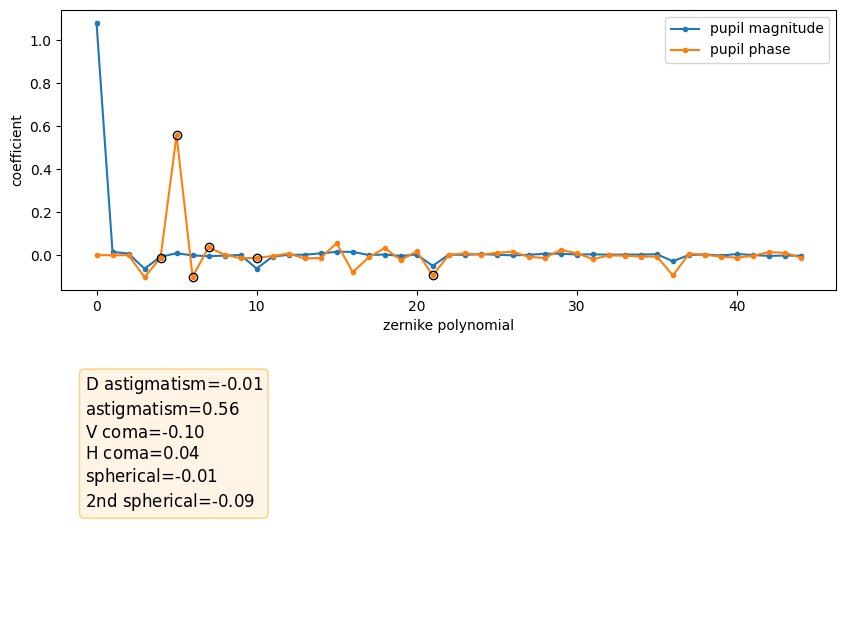

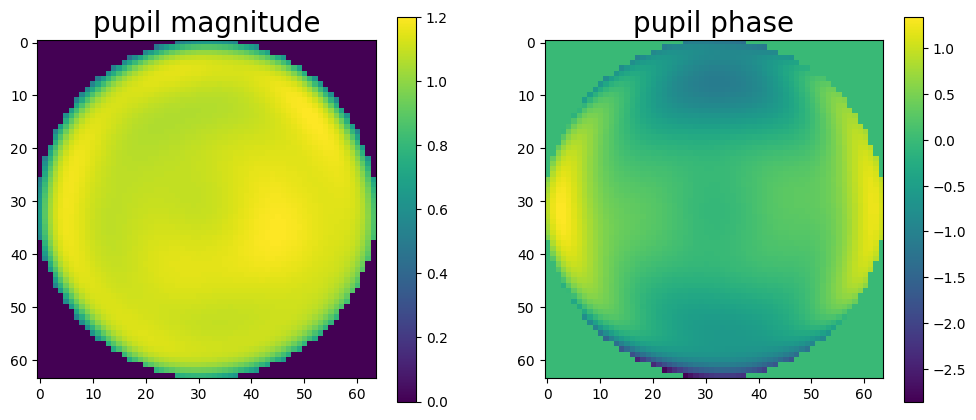

In [3]:
showzernike(f,p)

In [4]:
strehlratio = L.calstrehlratio(f)

Strehl ratio:  0.78954536


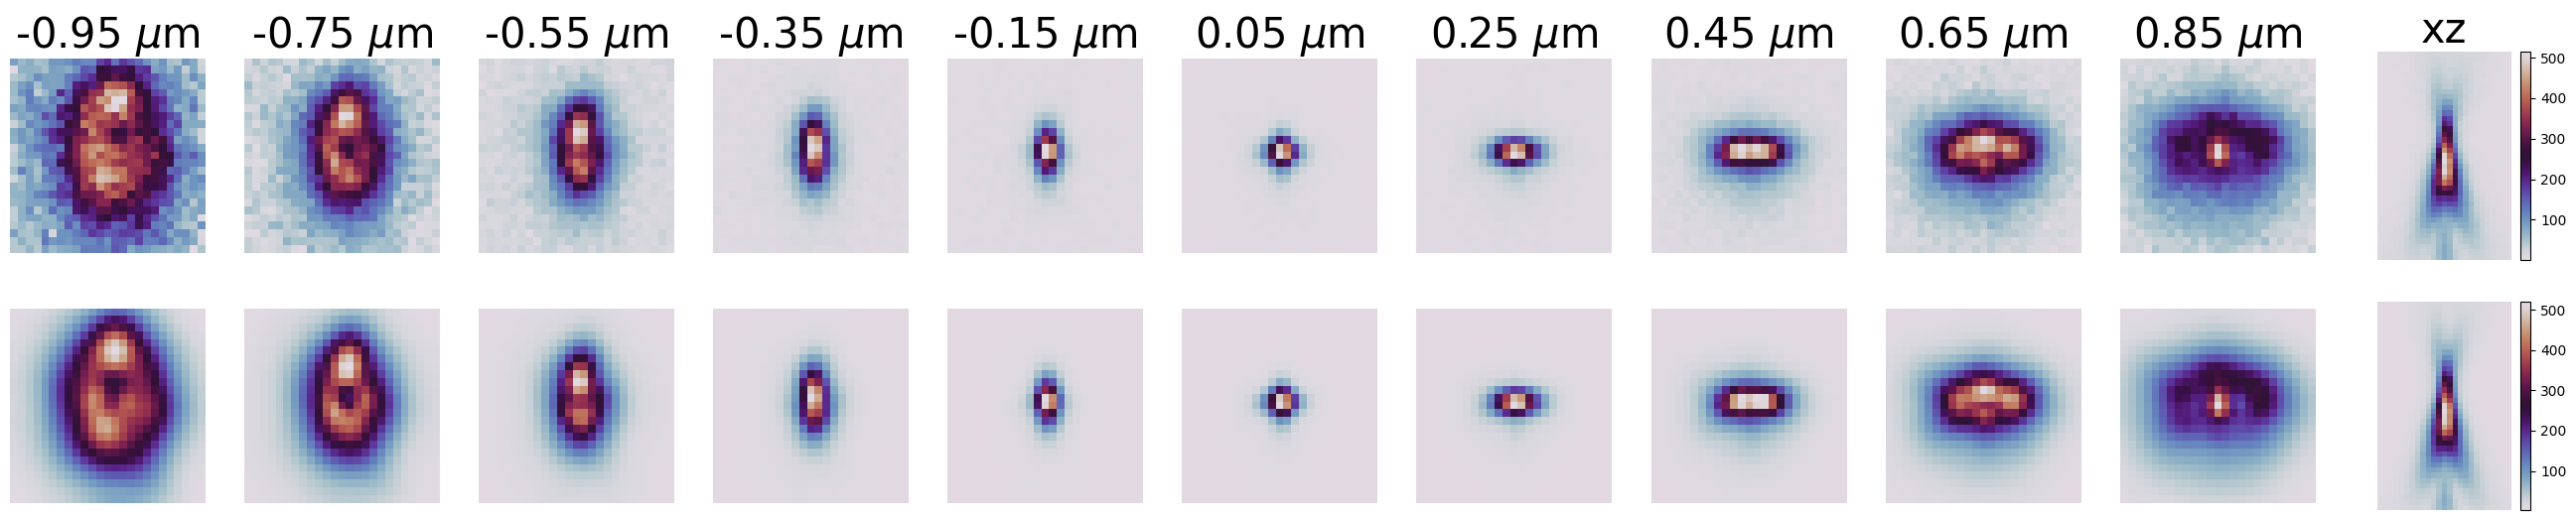

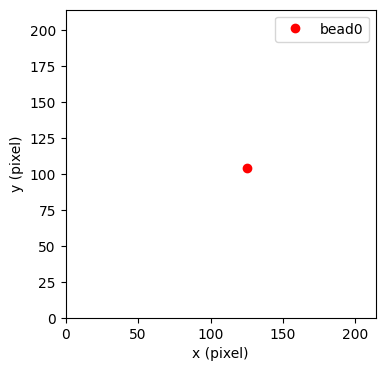

In [5]:
if 'insitu' in p.PSFtype:
    showpsfvsdata_insitu(f,p)
else:
    showpsfvsdata(f,p,index=0)

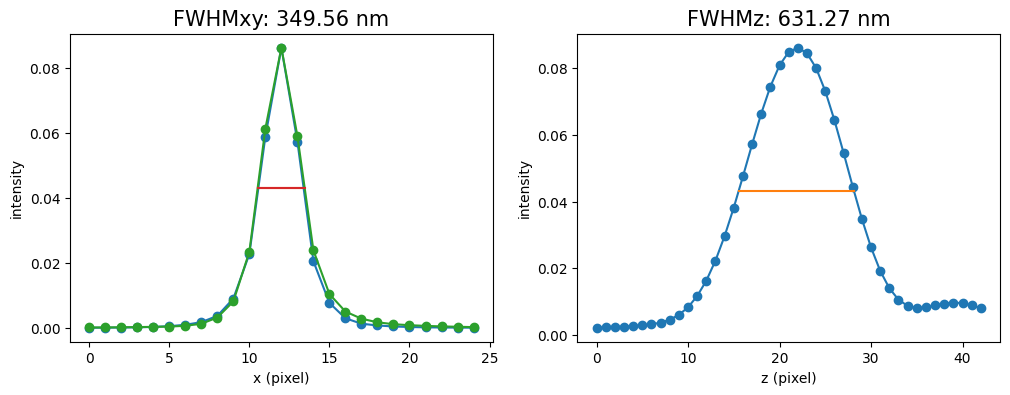

In [6]:
try:
    fwhmx,fwhmy,fwhmz = L.calfwhm(f)
except:
    print('fwhm not found')